<a href="https://colab.research.google.com/github/htapiagroup/sistdist/blob/mca2019/SistDist2_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumen Semana 1

* Como se "guarda" informacion en la computadora, uso de memoria


In [0]:
import numpy as np
import pandas as pd
import psutil, os

def huella_memoria():
  '''Regresa la huella de memoria en MB usada por un proceso de Python'''
  mem = psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

In [0]:
antes = huella_memoria()
x**2
despues = huella_memoria()
print('Memoria asignada a la operacion: {} MB'.format(despues-antes))
print('Memoria utilizada por el arreglo: {} MB'.format(x.nbytes / (1024**2)))

Memoria asignada a la operacion: 0.0 MB
Memoria utilizada por el arreglo: 50.0 MB


In [0]:
df = pd.DataFrame(x)
print('Memoria utilizada por el df: {} MB'.format(df.memory_usage(index=False) / (1024**2)))

Memoria utilizada por el df: 0    50.0
dtype: float64 MB


# Semana 2

Comenzaremos descargando los datos que usaremos

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [0]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv

--2019-05-14 15:53:05--  https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.96.109
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.96.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 772098307 (736M) [text/csv]
Saving to: ‘yellow_tripdata_2018-01.csv’

yellow_tripdata_201 100%[===================>] 736.33M  33.9MB/s    in 50s     

2019-05-14 15:53:55 (14.8 MB/s) - ‘yellow_tripdata_2018-01.csv’ saved [772098307/772098307]



In [0]:
!wc -l yellow_tripdata_2018-01.csv

8759876 yellow_tripdata_2018-01.csv


Vamos a escribir un programa para automatizar la descargar todo 2018 y 

In [0]:
plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/'+plantilla

In [0]:
for y in range(1,13):
  print(plantillaURL.format(y))

In [0]:
comandos = [plantillaURL.format(y) for y in range(1,13)]

In [0]:
(plantillaURL.format(y) for y in range(1,13))

<generator object <genexpr> at 0x7efd470dffc0>

In [0]:
# vamos a descargar los datos usando la instruccion en la lista comandos
comandos = [plantillaURL.format(y) for y in range(1,4)]
for cmd in comandos:
  os.system(cmd)

## Accediendo a los datos con pandas

In [0]:
archivo = 'yellow_tripdata_2018-01.csv'

In [0]:
df = pd.read_csv(archivo)

In [0]:
sum(df.memory_usage(index=False)/(1024**2))

1136.153091430664

In [0]:
for trozo in pd.read_csv(archivo, chunksize=50000):
  print('type: %s shape %s' % (type(trozo), trozo.shape))

In [0]:
trozo.shape

(9874, 17)

In [0]:
trozo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9874 entries, 8750000 to 8759873
Data columns (total 17 columns):
VendorID                 9874 non-null int64
tpep_pickup_datetime     9874 non-null object
tpep_dropoff_datetime    9874 non-null object
passenger_count          9874 non-null int64
trip_distance            9874 non-null float64
RatecodeID               9874 non-null int64
store_and_fwd_flag       9874 non-null object
PULocationID             9874 non-null int64
DOLocationID             9874 non-null int64
payment_type             9874 non-null int64
fare_amount              9874 non-null float64
extra                    9874 non-null float64
mta_tax                  9874 non-null float64
tip_amount               9874 non-null float64
tolls_amount             9874 non-null float64
improvement_surcharge    9874 non-null float64
total_amount             9874 non-null float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.3+ MB


In [0]:
trozo.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8750000,2,2018-01-31 23:36:22,2018-01-31 23:46:11,1,1.8,1,N,162,186,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76
8750001,1,2018-01-31 23:41:34,2018-01-31 23:45:40,2,1.0,1,N,234,79,1,5.5,0.5,0.5,2.00,0.0,0.3,8.80
8750002,1,2018-01-31 23:26:35,2018-01-31 23:29:48,2,0.6,1,N,234,170,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
8750003,1,2018-01-31 23:15:56,2018-01-31 23:16:09,1,9.6,1,N,77,77,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80
8750004,1,2018-01-31 23:17:26,2018-01-31 23:17:42,1,9.6,1,N,77,77,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80


Vamos a definir una condicion de `es_un_viaje_largo` si  el valor en la columna de `trip_distance` es mayor a 10 (millas, approx. 16km)

In [0]:
es_un_viaje_largo = (trozo.trip_distance > 10)
es_un_viaje_largo.head()

8750000    False
8750001    False
8750002    False
8750003    False
8750004    False
Name: trip_distance, dtype: bool

In [0]:
trozo.loc[es_un_viaje_largo].shape

(431, 17)

Encapsulemos esta operacion de filtrado en una funcion

In [0]:
def filtra_es_un_viaje_largo(data):
  es_un_viaje_largo = (data.trip_distance > 10)
  return data.loc[es_un_viaje_largo]

In [0]:
trozos = []
for trozo in pd.read_csv(archivo, chunksize=500000):
  trozos.append(filtra_es_un_viaje_largo(trozo))

In [0]:
len(trozos)

18

Es conveniente usar una *comprension de lista* para generar la lista anterior

In [0]:
trozos = [ filtra_es_un_viaje_largo(trozo) for trozo in pd.read_csv(archivo, chunksize=500000)]
len(trozos)

18

In [0]:
tamanos = [len(trozo) for trozo in trozos]
tamanos

In [0]:
np.mean(tamanos)

25934.11111111111

Vamos a concatenar todos estos trozos en una nueva estructura de datos `DataFrame`, 

Dicha estructura debera tener cuantos registros?

In [0]:
sum(tamanos)

466814

In [0]:
viajes_largos_df = pd.concat(trozos)
viajes_largos_df.shape

(466814, 17)

Ahora vamos a visualizar los datos filtrados

In [0]:
import matplotlib.pyplot as plt

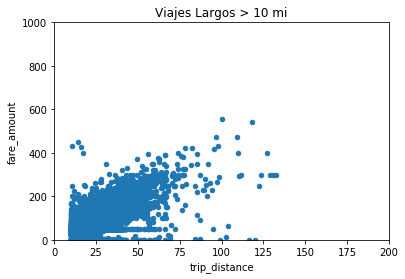

In [0]:
viajes_largos_df.plot.scatter(x='trip_distance', y='fare_amount', title='Viajes Largos > 10 mi',xlim=(0,200),ylim=(0,1000));

# Generadores

In [0]:
trozos = (filtra_es_un_viaje_largo(trozo) for trozo in pd.read_csv(archivo, chunksize=500000))

### Tarea: cual es la huella de memoria del generador anterior?

In [0]:
[trozo['trip_distance'].sum() for trozo in trozos]

In [0]:
distancias = (trozo['trip_distance'].sum() for trozo in trozos)

In [0]:
sum(distancias)

7339629.629999999

In [0]:
distancias

<generator object <genexpr> at 0x7efd3ee99728>

In [0]:
sum(distancias)

0

Vamos a leer muchos archivos 

In [0]:
df = pd.read_csv('yellow_tripdata_2018-01.csv', parse_dates=[1,2])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: datetime64[ns](2), float64(8), int64(6), object(1)
memory usage: 1.1+ GB


In [0]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [0]:
def cuenta_viajes_tardados(df):
  df['duracion'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds
  es_viaje_tardado = df.duracion > 1200 
  result_dict = {'n_long': [sum(es_viaje_tardado)],
                'n_total': [len(df)]}
  return pd.DataFrame(result_dict)

In [0]:
archivos = [plantilla.format(y) for y in range(1,4)]

In [0]:
dataframes = (pd.read_csv(archivo, parse_dates=[1,2]) for archivo in archivos)

In [0]:
totales = (cuenta_viajes_tardados(df) for df in dataframes)

In [0]:
totales_trimestrales = sum(totales)

In [0]:
print(totales_trimestrales)

    n_long   n_total
0  4942465  26682326


In [0]:
totales_trimestrales['n_long']/totales_trimestrales['n_total']

0    0.185234
dtype: float64

In [0]:
import time
